#Import Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#Load CSV Files

In [ ]:
# Load the CSV files for the analysis
# qb_stats.csv: Drake Maye and peer quarterbacks selected randomly plus Josh Allen
# qb_stats_top5.csv: Drake Maye and the top 5 QBs in the league (through Week 13, 2025)

qb_peers = pd.read_csv("/data/qb_stats.csv")
qb_top5 = pd.read_csv("/data/qb_stats.csv")

# Preview the first few rows to confirm data loaded correctly
qb_peers.head()
qb_top5.head()

,Player,Attempts,Completions,Yards,CompletionPct,Touchdowns
0,Drake Maye,386,276,3412,71.5,23
1,Dak Prescott,437,303,3261,69.3,25
2,Patrick Mahomes,441,285,3238,64.6,22
3,Matthew Stafford,401,266,3073,66.3,32
4,Daniel Jones,370,251,3041,67.8,19


#Compute Metrics Function

In [ ]:
def compute_metrics(df):
    """
    Computes additional quarterback metrics

    Adds the following columns:
    YPA: Yards per Attempt
    TD_per_Att: Touchdowns per Attempt

    Parameters:
    df (pandas.DataFrame): DataFrame containing at least 'Yards', 'Attempts', and 'Touchdowns'

    Returns:
    pandas.DataFrame: DataFrame with added metrics
    """
    df['YPA'] = df['Yards'] / df['Attempts']
    df['TD_per_Att'] = df['Touchdowns'] / df['Attempts']
    return df

#Apply Metrics to Dataframes

In [ ]:
# Apply the metrics function to both datasets
qb_peers = compute_metrics(qb_peers)
qb_top5 = compute_metrics(qb_top5)

# Preview updated dataframes
qb_peers.head()
qb_top5.head()

,Player,Attempts,Completions,Yards,CompletionPct,Touchdowns,YPA,TD_per_Att
0,Drake Maye,386,276,3412,71.5,23,8.839378,0.059585
1,Dak Prescott,437,303,3261,69.3,25,7.462243,0.057208
2,Patrick Mahomes,441,285,3238,64.6,22,7.342404,0.049887
3,Matthew Stafford,401,266,3073,66.3,32,7.663342,0.079800
4,Daniel Jones,370,251,3041,67.8,19,8.218919,0.051351


#Ranking Function

In [ ]:
def display_ranking(df, column, title):
    """
    Displays a ranking of quarterbacks based on a given metric.

    Parameters:
    df (pandas.DataFrame): DataFrame containing 'Player' and the metric column
    column (str): The column name to rank by
    title (str): The title to display above the ranking
    """
    print(f"\nRanking by {title}:\n")
    ranked = df.sort_values(by=column, ascending=False)
    display(ranked[['Player', column]])

#Display Rankings

In [ ]:
# Display rankings for the peer group
print("Peer Group Comparison:")
display_ranking(qb_peers, 'CompletionPct', 'Completion Percentage')
display_ranking(qb_peers, 'YPA', 'Yards per Attempt')
display_ranking(qb_peers, 'TD_per_Att', 'Touchdowns per Attempt')

# Display rankings for the top 5 quarterbacks
print("Top 5 QB Comparison:")
display_ranking(qb_top5, 'CompletionPct', 'Completion Percentage')
display_ranking(qb_top5, 'YPA', 'Yards per Attempt')
display_ranking(qb_top5, 'TD_per_Att', 'Touchdowns per Attempt')

Peer Group Comparison:

Ranking by Completion Percentage:



,Player,CompletionPct
0,Drake Maye,71.5
5,Jared Goff,69.8
1,Dak Prescott,69.3
4,Daniel Jones,67.8
3,Matthew Stafford,66.3
2,Patrick Mahomes,64.6



Ranking by Yards per Attempt:



,Player,YPA
0,Drake Maye,8.839378
4,Daniel Jones,8.218919
5,Jared Goff,8.002646
3,Matthew Stafford,7.663342
1,Dak Prescott,7.462243
2,Patrick Mahomes,7.342404



Ranking by Touchdowns per Attempt:



,Player,TD_per_Att
3,Matthew Stafford,0.079800
5,Jared Goff,0.066138
0,Drake Maye,0.059585
1,Dak Prescott,0.057208
4,Daniel Jones,0.051351
2,Patrick Mahomes,0.049887


Top 5 QB Comparison:

Ranking by Completion Percentage:



,Player,CompletionPct
0,Drake Maye,71.5
5,Jared Goff,69.8
1,Dak Prescott,69.3
4,Daniel Jones,67.8
3,Matthew Stafford,66.3
2,Patrick Mahomes,64.6



Ranking by Yards per Attempt:



,Player,YPA
0,Drake Maye,8.839378
4,Daniel Jones,8.218919
5,Jared Goff,8.002646
3,Matthew Stafford,7.663342
1,Dak Prescott,7.462243
2,Patrick Mahomes,7.342404



Ranking by Touchdowns per Attempt:



,Player,TD_per_Att
3,Matthew Stafford,0.079800
5,Jared Goff,0.066138
0,Drake Maye,0.059585
1,Dak Prescott,0.057208
4,Daniel Jones,0.051351
2,Patrick Mahomes,0.049887


#Plotting
Various functions for plotting

In [ ]:
def plot_bar(df, column, title, ylabel):
    """
    Creates a bar chart for a given metric.

    Parameters:
    df (pandas.DataFrame): DataFrame containing 'Player' and the metric column
    column (str): Column name to plot
    title (str): Plot title
    ylabel (str): Y-axis label
    """
    plt.figure(figsize=(8,5))
    plt.bar(df['Player'], df[column], color='skyblue')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_scatter(df, x_col, y_col, title):
    """
    Creates a scatter plot comparing two metrics.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the columns to plot
    x_col (str): Column name for x-axis
    y_col (str): Column name for y-axis
    title (str): Plot title
    """
    plt.figure(figsize=(8,5))
    plt.scatter(df[x_col], df[y_col], color='green', s=100)
    # Annotate each point with player name
    for i, player in enumerate(df['Player']):
        plt.text(df[x_col][i]+0.1, df[y_col][i]+0.001, player)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.tight_layout()
    plt.show()

#Generate Top 5 QB Plots

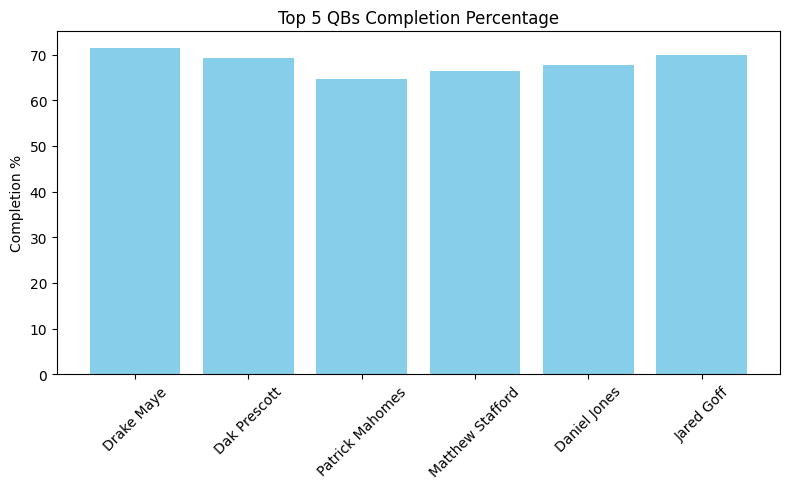

In [ ]:
# 1. Completion Percentage Bar Chart
plot_bar(qb_top5, 'CompletionPct', 'Top 5 QBs Completion Percentage', 'Completion %')

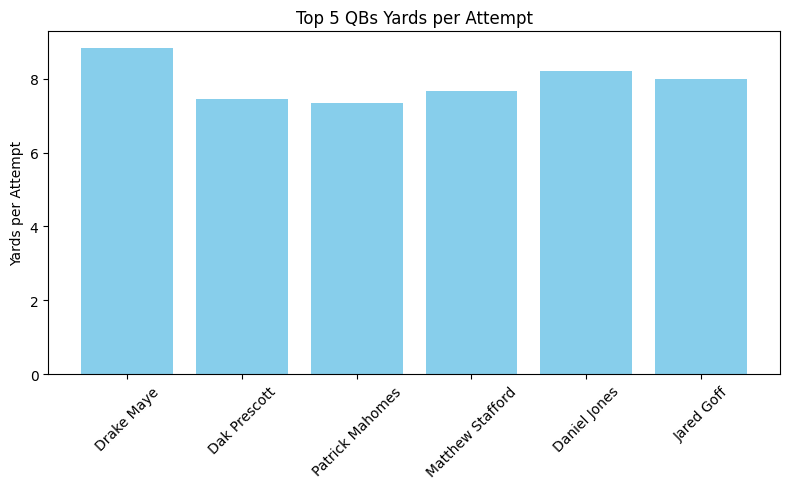

In [ ]:
# 2. Yards per Attempt (YPA) Bar Chart
plot_bar(qb_top5, 'YPA', 'Top 5 QBs Yards per Attempt', 'Yards per Attempt')

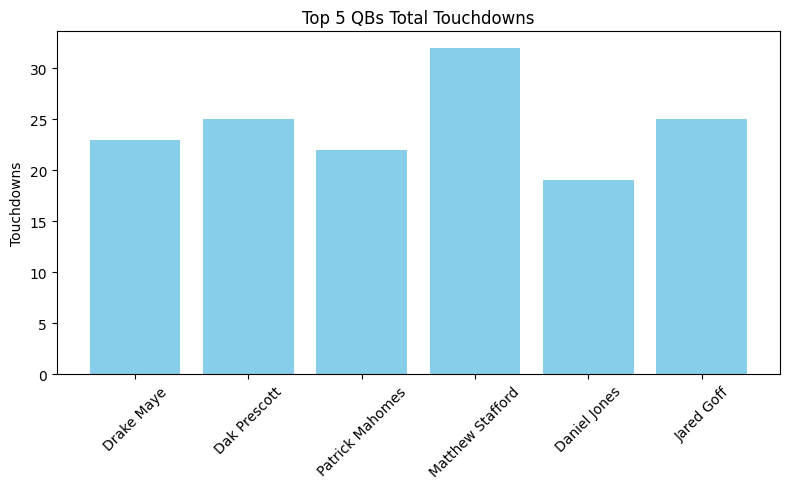

In [ ]:
# 3. Touchdowns Bar Chart
plot_bar(qb_top5, 'Touchdowns', 'Top 5 QBs Total Touchdowns', 'Touchdowns')

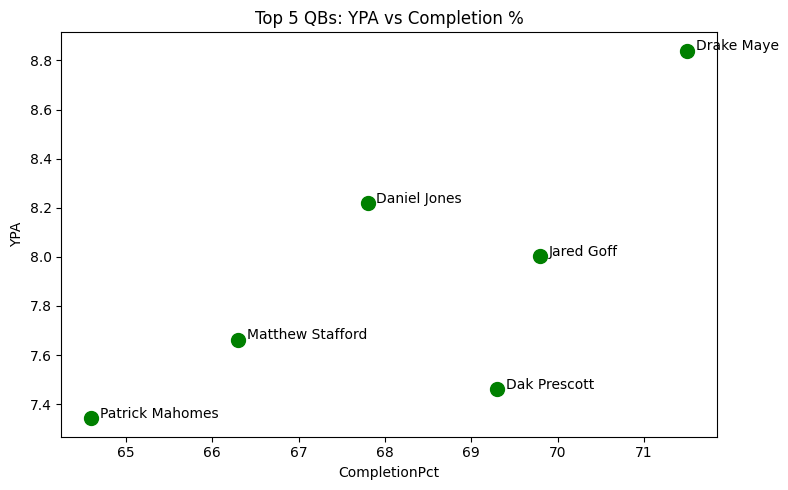

In [ ]:
# 4. Scatter Plot: YPA vs Completion Percentage
plot_scatter(qb_top5, 'CompletionPct', 'YPA', 'Top 5 QBs: YPA vs Completion %')

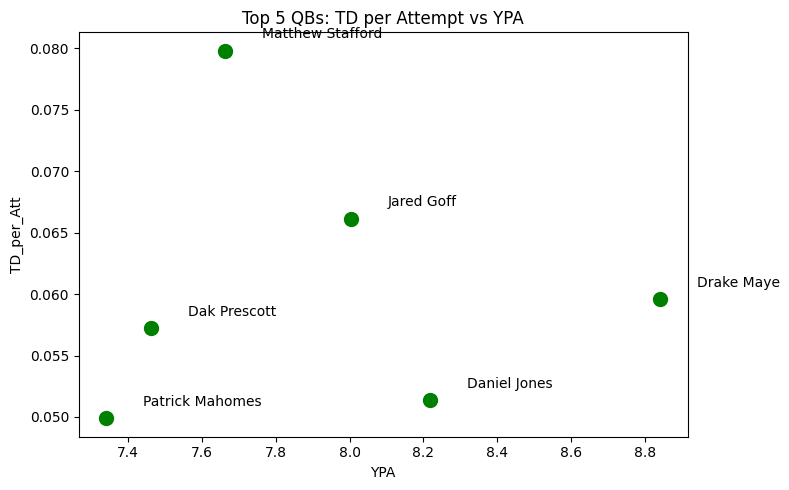

In [ ]:
# 5. Scatter Plot: TD per Attempt vs YPA
plot_scatter(qb_top5, 'YPA', 'TD_per_Att', 'Top 5 QBs: TD per Attempt vs YPA')